# Context Sizes (old)

In [ ]:
import re

output_path_context = "../../EHRSHOT_ASSETS/figures/performance_context_sizes.png"

# Process data
qwen_data = " 0.672 (0.648 - 0.696), 0.759 (0.736 - 0.782), 0.767 (0.742 - 0.793), 0.774 (0.749 - 0.799), 0.743 (0.716 - 0.770)"
llama_data = "0.680 (0.653 - 0.707), 0.744 (0.721 - 0.767), 0.766 (0.744 - 0.788), 0.742 (0.714 - 0.769), 0.738 (0.708 - 0.769)"

# Context sizes and performance data
context_sizes = [512, 1024, 2048, 4096, 8192]

def parse_data_string(data):
    # Extract means, lower, and upper using regex
    matches = re.findall(r"([\d.]+) \(([\d.]+) - ([\d.]+)\)", data)

    # Separate into lists
    means = [float(match[0]) for match in matches]
    lower = [float(match[1]) for match in matches]
    upper = [float(match[2]) for match in matches]
    return means, lower, upper

gte_means, gte_lower, gte_upper = parse_data_string(qwen_data)
llama_means, llama_lower, llama_upper = parse_data_string(llama_data)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Style configuration
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.dpi': 180,
    'savefig.bbox': 'tight',
    'lines.linewidth': 1.5,
    'axes.grid': True,
    'grid.alpha': 0.3
})

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Data strings
qwen_data = "0.672 (0.648 - 0.696), 0.759 (0.736 - 0.782), 0.767 (0.742 - 0.793), 0.774 (0.749 - 0.799), 0.743 (0.716 - 0.770)"
llama_data = "0.680 (0.653 - 0.707), 0.744 (0.721 - 0.767), 0.766 (0.744 - 0.788), 0.742 (0.714 - 0.769), 0.738 (0.708 - 0.769)"
context_sizes = [512, 1024, 2048, 4096, 8192]

output_path_png = "../../EHRSHOT_ASSETS/figures_ben/context_size_performance_adapted.png"
output_path_pdf = "../../EHRSHOT_ASSETS/figures_ben/context_size_performance_adapted.pdf"

# Parse the data strings into means and confidence intervals
def parse_data_string(data):
    matches = re.findall(r"([\d.]+) \(([\d.]+) - ([\d.]+)\)", data)
    means = [float(m[0]) for m in matches]
    lower = [float(m[1]) for m in matches]
    upper = [float(m[2]) for m in matches]
    return means, lower, upper

# Parsed data
qwen_means, qwen_lower, qwen_upper = parse_data_string(qwen_data)
llama_means, llama_lower, llama_upper = parse_data_string(llama_data)

# Define colors and markers consistent with other figures
color_qwen = "#1F78B4"  # Blue for Qwen
color_llama = "#FF7F00"  # Orange for Llama
marker_qwen = "o"  # Circle for Qwen
marker_llama = "s"  # Square for Llama

# Initialize the plot
plt.style.use("seaborn-v0_8-paper")
fig, ax = plt.subplots(figsize=(6, 4), dpi=180)

# Clean plot: remove top and right spines
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# Title and axis labels
ax.set_title("Performance Across Context Sizes", fontsize=14, pad=10, fontweight="bold")
ax.set_xlabel("Input Context Size", fontsize=12, fontweight="bold")
ax.set_ylabel("Macro AUROC (95% CI)", fontsize=12, fontweight="bold")

# Logarithmic x-axis for context sizes
ax.set_xscale("log")
ax.set_xticks(context_sizes)
ax.set_xticklabels(context_sizes, fontsize=10)
ax.set_ylim(0.64, 0.81)
ax.set_yticks(np.arange(0.65, 0.81, 0.05))

# Horizontal gridlines for clarity
ax.grid(visible=True, which="major", axis="y", linestyle="--", alpha=0.6)

# Plot Qwen data
ax.plot(context_sizes, qwen_means, label="GTE-Qwen2-7B", marker=marker_qwen, linestyle="-", linewidth=2, color=color_qwen)
ax.fill_between(context_sizes, qwen_lower, qwen_upper, color=color_qwen, alpha=0.15)

# Plot Llama data
ax.plot(context_sizes, llama_means, label="LLM2Vec-Llama-3.1-8B", marker=marker_llama, linestyle="-", linewidth=2, color=color_llama)
ax.fill_between(context_sizes, llama_lower, llama_upper, color=color_llama, alpha=0.15)

# Legend for model names
legend_elements = [
    plt.Line2D([0], [0], marker=marker_qwen, color=color_qwen, label="GTE-Qwen2-7B", linestyle="None", markersize=8),
    plt.Line2D([0], [0], marker=marker_llama, color=color_llama, label="LLM2Vec-Llama-3.1-8B", linestyle="None", markersize=8),
]
ax.legend(handles=legend_elements, loc="best", frameon=False, fontsize=10, title="Model Names")

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
output_dir = os.path.dirname(output_path_png)
os.makedirs(output_dir, exist_ok=True)
plt.savefig(output_path_png, dpi=300, bbox_inches='tight')
plt.savefig(output_path_pdf, dpi=300, bbox_inches='tight')

plt.show()

# Scaling Behavior

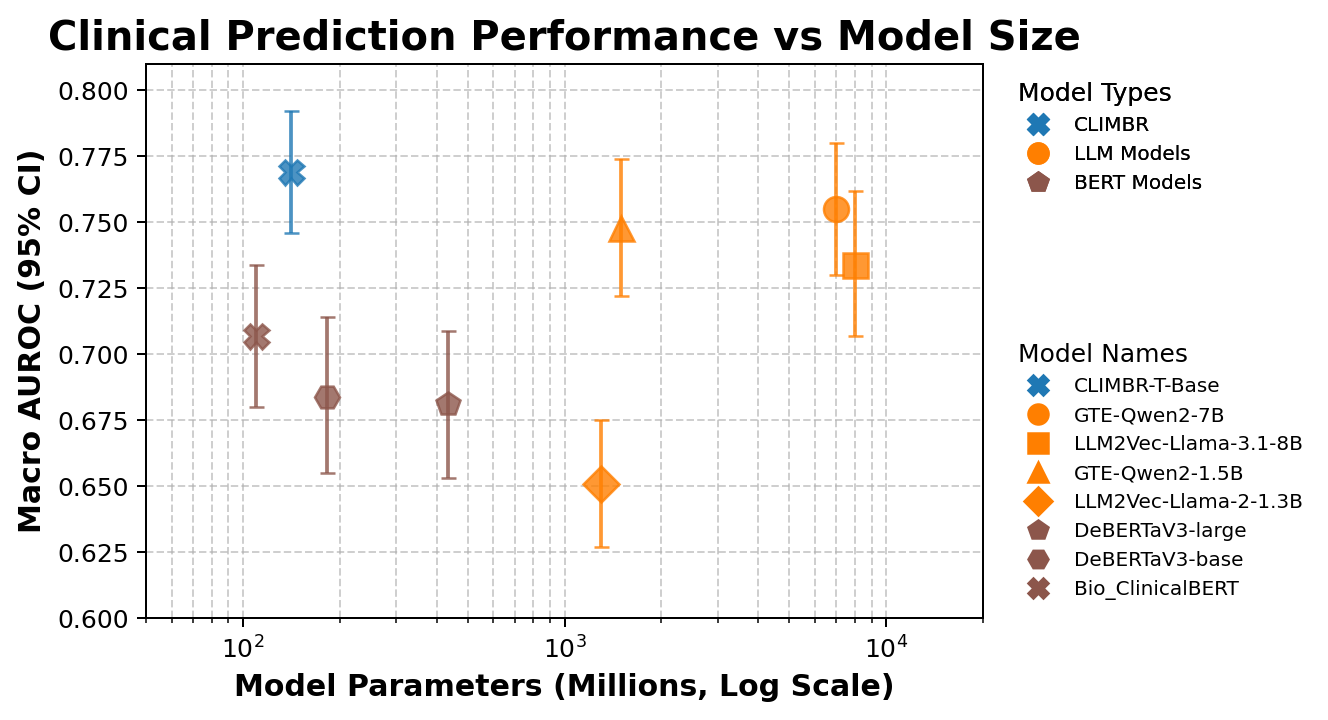

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Updated models with unique colors and markers
models = [
    {"name": "CLIMBR-T-Base", "million_parameters": 141, "performance": (0.746, 0.769, 0.792), "color": "#1F78B4", "marker": "X", "type": "CLIMBR"},
    {"name": "GTE-Qwen2-7B", "million_parameters": 7000, "performance": (0.730, 0.755, 0.780), "color": "#FF7F00", "marker": "o", "type": "LLM"},
    {"name": "LLM2Vec-Llama-3.1-8B", "million_parameters": 8000, "performance": (0.707, 0.734, 0.762), "color": "#FF7F00", "marker": "s", "type": "LLM"},
    {"name": "GTE-Qwen2-1.5B", "million_parameters": 1500, "performance": (0.722, 0.748, 0.774), "color": "#FF7F00", "marker": "^", "type": "LLM"},
    {"name": "LLM2Vec-Llama-2-1.3B", "million_parameters": 1300, "performance": (0.627, 0.651, 0.675), "color": "#FF7F00", "marker": "D", "type": "LLM"},
    {"name": "DeBERTaV3-large", "million_parameters": 434, "performance": (0.653, 0.681, 0.709), "color": "#8C564B", "marker": "p", "type": "BERT"},
    {"name": "DeBERTaV3-base", "million_parameters": 183, "performance": (0.655, 0.684, 0.714), "color": "#8C564B", "marker": "H", "type": "BERT"},
    {"name": "Bio_ClinicalBERT", "million_parameters": 110, "performance": (0.680, 0.707, 0.734), "color": "#8C564B", "marker": "X", "type": "BERT"},
]

# Initialize the plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=180)

# Title and axis labels
ax.set_title("Clinical Prediction Performance vs Model Size", fontsize=16, fontweight="bold")
ax.set_xlabel("Model Parameters (Millions, Log Scale)", fontsize=12, fontweight="bold")
ax.set_ylabel("Macro AUROC (95% CI)", fontsize=12, fontweight="bold")

# Set x and y scales
ax.set_xscale("log")
ax.set_xlim(50, 20000)
ax.set_ylim(0.60, 0.81)

# Add grid with logarithmic spacing
ax.grid(visible=True, which="both", axis="x", linestyle="--", alpha=0.6)
# Also add horizontal gridlines for clarity
ax.yaxis.grid(visible=True, which="major", linestyle="--", alpha=0.6)

# Plot data points with confidence intervals
for model in models:
    x = model["million_parameters"]
    mean = model["performance"][1]
    lower = model["performance"][0]
    upper = model["performance"][2]
    color = model["color"]
    marker = model["marker"]

    # Plot the data points and confidence intervals
    ax.errorbar(
        x, mean, yerr=[[mean-lower], [upper-mean]],
        fmt=marker, color=color, markersize=10, alpha=0.8, capsize=3, label=model["name"]
    )

# Create grouped legends
# Legend 1: Model Types (colors)
model_type_legend_elements = [
    plt.Line2D([0], [0], marker="X", color="#1F78B4", label="CLIMBR", linestyle="None", markersize=8),
    plt.Line2D([0], [0], marker="o", color="#FF7F00", label="LLM Models", linestyle="None", markersize=8),
    plt.Line2D([0], [0], marker="p", color="#8C564B", label="BERT Models", linestyle="None", markersize=8),
]

# Legend 2: Model Names (symbols)
model_name_legend_elements = [
    plt.Line2D([0], [0], marker=model["marker"], color=model["color"], label=model["name"],
               linestyle="None", markersize=8) for model in models
]

# Add legends outside the plot with better alignment
leg1 = ax.legend(handles=model_type_legend_elements, loc="upper left", bbox_to_anchor=(1.02, 1), fontsize=8, title="Model Types", frameon=False)
leg1._legend_box.align = "left"

leg2 = ax.legend(handles=model_name_legend_elements, loc="lower left", bbox_to_anchor=(1.02, 0.), fontsize=8, title="Model Names", frameon=False)
leg2._legend_box.align = "left"

ax.add_artist(leg1)  # Ensure first legend remains in place

ax.add_artist(leg1)  # Manually add the first legend to avoid overlap

# Adjust layout
# plt.tight_layout()

# Save or display the plot
plt.savefig("../../EHRSHOT_ASSETS/figures_ben/performance_with_two_legends.png", dpi=300, bbox_inches='tight')
plt.savefig("../../EHRSHOT_ASSETS/figures_ben/performance_with_two_legends.pdf", dpi=300, bbox_inches='tight')
plt.show()

# Context Sizes (updated)

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np
from plot import (
    _plot_unified_legend,
)

qwen_data = "0.672 (0.648 - 0.696), 0.759 (0.736 - 0.782), 0.767 (0.742 - 0.793), 0.774 (0.749 - 0.799), 0.743 (0.716 - 0.770)"
llama_data = "0.680 (0.653 - 0.707), 0.744 (0.721 - 0.767), 0.766 (0.744 - 0.788), 0.742 (0.714 - 0.769), 0.738 (0.708 - 0.769)"
context_sizes = [512, 1024, 2048, 4096, 8192]

output_path_png = "../../EHRSHOT_ASSETS/figures_ben/context_size_performance_adapted.png"
output_path_pdf = "../../EHRSHOT_ASSETS/figures_ben/context_size_performance_adapted.pdf"

# Parse the data strings into means and confidence intervals
def parse_data_string(data):
    matches = re.findall(r"([\d.]+) \(([\d.]+) - ([\d.]+)\)", data)
    means = [float(m[0]) for m in matches]
    lower = [float(m[1]) for m in matches]
    upper = [float(m[2]) for m in matches]
    return means, lower, upper

# Parsed data
qwen_means, qwen_lower, qwen_upper = parse_data_string(qwen_data)
llama_means, llama_lower, llama_upper = parse_data_string(llama_data)

# Define colors and markers consistent with other figures
color_llama = "#33a02c"  
color_qwen= "#FF7F00" 
marker_qwen = "o" 
marker_llama = "o" 

# Initialize the plot
plt.style.use("seaborn-v0_8-paper")
fig, ax = plt.subplots(figsize=(6, 4), dpi=180)

# Title and axis labels
ax.set_title("Performance Across Context Sizes", fontsize=12, pad=10, fontweight="bold")
ax.set_xlabel("Input Context Size (log scale)", fontweight="bold")
ax.set_ylabel("Macro AUROC (95% CI)", fontweight="bold")

# Logarithmic x-axis for context sizes
ax.set_xscale("log")
ax.minorticks_off()
ax.set_xticks(context_sizes)
ax.set_xticklabels(context_sizes, fontsize=10)
ax.set_ylim(0.64, 0.81)
ax.set_yticks(np.arange(0.65, 0.81, 0.05))

# Improve grid
# ax.grid(visible=True, which="both", linestyle="-", alpha=0.2)
# ax.grid(True, which='minor', linestyle=':', alpha=0.2)

# Format axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=8)

# Plot Qwen data
ax.plot(context_sizes, qwen_means, label="GTE-Qwen2-7B",
        marker=marker_qwen, linestyle="-", linewidth=1.5,
        markersize=8, color=color_qwen,
        markeredgecolor="white", markeredgewidth=1.5)
ax.fill_between(context_sizes, qwen_lower, qwen_upper, color=color_qwen, alpha=0.15)

# Plot Llama data
ax.plot(context_sizes, llama_means, label="LLM2Vec-Llama-3.1-8B",
        marker=marker_llama, linestyle="-", linewidth=1.5,
        markersize=8, color=color_llama,
        markeredgecolor="white", markeredgewidth=1.5)
ax.fill_between(context_sizes, llama_lower, llama_upper, color=color_llama, alpha=0.15)

# Legend for model names
legend_elements = [
    plt.Line2D([0], [0], marker=marker_qwen, color=color_qwen, label="GTE-Qwen2-7B", linestyle="None", markersize=8),
    plt.Line2D([0], [0], marker=marker_llama, color=color_llama, label="LLM2Vec-Llama-3.1-8B", linestyle="None", markersize=8),
]
# ax.legend(handles=legend_elements, loc="lower left", frameon=False, fontsize=10, title="Model Names")
_plot_unified_legend(fig, np.array([[ax]]), fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
plt.savefig(output_path_png, dpi=300, bbox_inches='tight')
plt.savefig(output_path_pdf, dpi=300, bbox_inches='tight')

plt.show()

# Time Windows

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np
from plot import (
    _plot_unified_legend,
)

# Data strings (reference: https://docs.google.com/presentation/d/1THx_hGoxF6yGM_jYnqsNMcPufXsEKP0xeX87KTW7UmU/edit?slide=id.g34372a89f79_0_23#slide=id.g34372a89f79_0_23)
qwen_data = "0.760 (0.732 - 0.788) 0.768 (0.743 - 0.792) 0.773 (0.746 - 0.801) 0.765 (0.743 - 0.787) 0.762 (0.738 - 0.787) 0.755 (0.730 - 0.780)"
llama_data = "0.761 (0.735 - 0.786) 0.762 (0.735 - 0.789) 0.767 (0.739 - 0.794) 0.748 (0.719 - 0.776) 0.736 (0.706 - 0.767) 0.734 (0.706 - 0.761)" 
time_windows = ["1 day", "1 week", "1 month", "1 year", "3 years", "full"]
time_windows_ticks = np.arange(1, len(time_windows) + 1)

output_path_png = "../../EHRSHOT_ASSETS/figures_ben/context_size_performance_adapted.png"
output_path_pdf = "../../EHRSHOT_ASSETS/figures_ben/context_size_performance_adapted.pdf"

# Parse the data strings into means and confidence intervals
def parse_data_string(data):
    matches = re.findall(r"([\d.]+) \(([\d.]+) - ([\d.]+)\)", data)
    means = [float(m[0]) for m in matches]
    lower = [float(m[1]) for m in matches]
    upper = [float(m[2]) for m in matches]
    return means, lower, upper

# Parsed data
qwen_means, qwen_lower, qwen_upper = parse_data_string(qwen_data)
llama_means, llama_lower, llama_upper = parse_data_string(llama_data)

# Define colors and markers consistent with other figures
color_llama = "#33a02c"  
color_qwen= "#FF7F00" 
marker_qwen = "o" 
marker_llama = "o" 

# Initialize the plot
plt.style.use("seaborn-v0_8-paper")
fig, ax = plt.subplots(figsize=(6, 4), dpi=180)

# Clean plot: remove top and right spines
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# Title and axis labels
ax.set_title("Performance Across Time Windows", fontsize=12, pad=10, fontweight="bold")
ax.set_xlabel("Time Window", fontweight="bold")
ax.set_ylabel("Macro AUROC (95% CI)", fontweight="bold")

# Logarithmic x-axis for context sizes
# ax.set_xscale("log")
ax.set_xticks(time_windows_ticks)
ax.set_xticklabels(time_windows, fontsize=10)
ax.set_ylim(0.69, 0.81)
ax.set_yticks(np.arange(0.70, 0.81, 0.05))

# Improve grid
# ax.grid(visible=True, which="both", linestyle="-", alpha=0.2)
# ax.grid(True, which='minor', linestyle=':', alpha=0.2)

# Format axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=8)

# Plot Qwen data
ax.plot(time_windows_ticks, qwen_means, label="GTE-Qwen2-7B",
        marker=marker_qwen, linestyle="-", linewidth=1.5,
        markersize=8, color=color_qwen,
        markeredgecolor="white", markeredgewidth=1.5)
ax.fill_between(time_windows_ticks, qwen_lower, qwen_upper, color=color_qwen, alpha=0.15)

# Plot Llama data
ax.plot(time_windows_ticks, llama_means, label="LLM2Vec-Llama-3.1-8B",
        marker=marker_llama, linestyle="-", linewidth=1.5,
        markersize=8, color=color_llama,
        markeredgecolor="white", markeredgewidth=1.5)
ax.fill_between(time_windows_ticks, llama_lower, llama_upper, color=color_llama, alpha=0.15)

# Legend for model names
legend_elements = [
    plt.Line2D([0], [0], marker=marker_qwen, color=color_qwen, label="GTE-Qwen2-7B", linestyle="None", markersize=8),
    plt.Line2D([0], [0], marker=marker_llama, color=color_llama, label="LLM2Vec-Llama-3.1-8B", linestyle="None", markersize=8),
]
# ax.legend(handles=legend_elements, loc="lower left", frameon=False, fontsize=10, title="Model Names")
_plot_unified_legend(fig, np.array([[ax]]), fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
plt.savefig(output_path_png, dpi=300, bbox_inches='tight')
plt.savefig(output_path_pdf, dpi=300, bbox_inches='tight')

plt.show()